# Obtaining a $R_{0}$ value in the agent based model

The basis of the calculations I have performed is that a single individual that is placed in a completly susceptible population can interact with all its neighbours without restrictions using an exponential kernel as exposition increment. However, this exponential kernel does not grow over the density of infected individuals, since the exposition is at most equal to the density.

Considering density uniform density of individuals across the landscape, we can consider the integral equation:

$$ R_{0} = \int_{0}^{\infty} \int_{0}^{2\pi} F \left( \int_{0}^{T} r \beta e^{-kr} \rho dt \right) d\theta dr $$


Where F is a function that takes all values over density in $(r,\theta)$ as $\rho$. Splitting the integration domain in an interval $0,r_{0}$ where the exposition would be larger than the density and another interval $r_{0}, \inf$ where the exposition would be shorter than the the integral, we obtain two integrals with known primitives.

$$ r_{0} = \frac{1}{k}\log(\beta T)$$


$$ R_{0} = \rho r_{0}^{2} \pi + \frac{2\pi\beta\rho}{k^{2}}e^{-kr_{0}}(kr_{0} + 1)$$


Since T is an stochastic variable in the model, to obtain the average $R_{0}$ value we must calculate the first moment as:

$$ < R_{0} > = \int_{0}^{\infty}R_{0}f(T)dT $$

where

$$ f(T) = \exp(\mu + \sigma Z) = \exp\left(\mu + \frac{\sigma}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}\right)$$


Since this expresion has no known integral, we will perform a numeric integral for all three pathotypes



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as integrate
import pandas as pd
import seaborn as sns
sns.set_style('white')
sns.set_palette('Set2')

In [2]:
mu = dict(P0=3.46, P12 = 4.19, P123=3.74)
sigma = 0.32
beta = dict(P0 = 1.0, P12 = 0.49, P123 = 0.25)
rho = 2
k = 1.25



In [12]:
def R0(T, i):
    term1 = 2*np.pi*beta[i]*rho*T/k
    term2 = 2*np.pi*rho/k
    return (term1 * np.exp(-np.log(beta[i]*T))) + (term2 * np.log(beta[i]*T))
    

In [3]:
def R0(T, i ):
    r0 = (1/k) * (np.log(beta[i] * T))
    if r0 < 0 : 
        r0 = 0
    term1 = rho * np.pi * (r0 ** 2)
    term2 = 2*np.pi*beta[i]*rho*(k**-2)*np.exp(-k*r0)*((k*r0)+1)
    return (term1 + term2)

In [4]:
def lognormal(T,i):
    logT = - ((np.log(T) - mu[i])**2)/(2*(sigma**2))
    return 1/(T*sigma*np.sqrt(2*np.pi)) * np.exp(logT)

    

In [30]:
r0_dict = dict(
    P0 = integrate.quad(lambda x: R0(x, 'P0')*lognormal(x, 'P0'), 0, np.inf)[0],
    P12 = integrate.quad(lambda x: R0(x, 'P12')*lognormal(x, 'P12'), 0, np.inf)[0],
    P123 = integrate.quad(lambda x: R0(x, 'P123')*lognormal(x, 'P123'), 0, np.inf)[0]
)



In [31]:
r0_dict

{'P0': 49.71178375818006, 'P12': 49.57770723471813, 'P123': 23.342921842222637}

In [98]:
r0_2_dict = dict(
    P0 = integrate.quad(lambda x: (R0(x, 'P0')**2)*lognormal(x, 'P0'), 0, np.inf)[0],
    P12 = integrate.quad(lambda x: (R0(x, 'P12')**2)*lognormal(x, 'P12'), 0, np.inf)[0],
    P123 = integrate.quad(lambda x: (R0(x, 'P123')**2)*lognormal(x, 'P123'), 0, np.inf)[0]
)

In [99]:
r0_2_dict

{'P0': 2545.938840013348, 'P12': 2535.913558055799, 'P123': 580.2117382385393}

In [101]:
variance = dict()
for i in r0_dict.keys():
    variance[i] = np.sqrt(r0_2_dict[i] - (r0_dict[i]**2))
variance

{'P0': 8.6416083915723192,
 'P12': 8.8297510386406994,
 'P123': 5.9430411496492823}

In [35]:
T_mean = dict(
    P0 = integrate.quad(lambda x: x*lognormal(x, 'P0'), 0, np.inf)[0],
    P12 = integrate.quad(lambda x: x*lognormal(x, 'P12'), 0, np.inf)[0],
    P123 = integrate.quad(lambda x: x*lognormal(x, 'P123'), 0, np.inf)[0]
)

In [36]:
T_mean

{'P0': 33.48842979767444, 'P12': 69.4911912546105, 'P123': 44.309539833672325}

In [19]:
def R0_eff(T, i):
    term1 = 0
    term2 = 2*np.pi*rho/k
    return (term1 * np.exp(-np.log(beta[i]*T))) + (term2 * np.log(beta[i]*T))

In [94]:
def R0_eff(T, i ):
    r0 = (1/k) * np.log(beta[i] * T)
    return np.pi * rho * (r0 ** 2)

In [95]:
r0_eff_dict = dict(
    P0 = integrate.quad(lambda x: R0_eff(x, 'P0')*lognormal(x, 'P0'), 0, np.inf)[0],
    P12 = integrate.quad(lambda x: R0_eff(x, 'P12')*lognormal(x, 'P12'), 0, np.inf)[0],
    P123 = integrate.quad(lambda x: R0_eff(x, 'P123')*lognormal(x, 'P123'), 0, np.inf)[0]
)

In [96]:
r0_eff_dict

{'P0': 48.55243481528726,
 'P12': 49.016871796771206,
 'P123': 22.689156113689926}

In [102]:
r0_2_eff_dict = dict(
    P0 = integrate.quad(lambda x: (R0_eff(x, 'P0')**2)*lognormal(x, 'P0'), 0, np.inf)[0],
    P12 = integrate.quad(lambda x: (R0_eff(x, 'P12')**2)*lognormal(x, 'P12'), 0, np.inf)[0],
    P123 = integrate.quad(lambda x: (R0_eff(x, 'P123')**2)*lognormal(x, 'P123'), 0, np.inf)[0]
)
variance = dict()
for i in r0_dict.keys():
    variance[i] = np.sqrt(r0_2_eff_dict[i] - (r0_eff_dict[i]**2))
variance

{'P0': 8.9236520432266655,
 'P12': 8.9664117476962382,
 'P123': 6.0854068712921991}

In [23]:
def infected_radius(T, i):
    return (1/k)*np.log(beta[i]*T)


C:\Users\Bruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Bruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


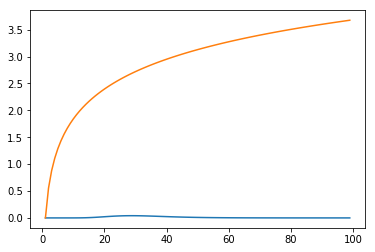

In [25]:
pdf_lognormal = np.zeros(100)
radius = np.zeros(100)
TT = np.arange(0, 100)
for i in range(TT.size):
    pdf_lognormal[i] = lognormal(TT[i], 'P0')
    radius[i] = infected_radius(TT[i], 'P0')
plt.plot(TT, pdf_lognormal)
plt.plot(TT, radius)
plt.show()

In [26]:
radius_dict = dict(
    P0 = integrate.quad(lambda x: infected_radius(x, 'P0')*lognormal(x, 'P0'), 0, np.inf)[0],
    P12 = integrate.quad(lambda x: infected_radius(x, 'P12')*lognormal(x, 'P12'), 0, np.inf)[0],
    P123 = integrate.quad(lambda x: infected_radius(x, 'P123')*lognormal(x, 'P123'), 0, np.inf)[0]
)

In [27]:
radius_dict

{'P0': 2.7680000000000007, 'P12': 2.781320089698029, 'P123': 1.882964511104086}

In [37]:
(2.8**2) * np.pi * 2

49.26017280828795

In [5]:
def exponential_times(T, i):
    chi = lamb * np.exp(phi[i])
    return chi*np.exp(-chi*T)

In [20]:
phi = dict(P0 = 1.629, P12 = 0.628, P123 = 1.229)
lamb_list = 10 ** np.arange(-2, 0.2, 0.2)
surv_data = dict(
    P0 = [], 
    P12 = [], 
    P123 = []
)
for lamb in lamb_list : 
    for patho in phi.keys():
        ff = integrate.quad(lambda x: R0(x, patho)*exponential_times(x, patho), 0, np.inf)[0]
        surv_data[patho].append(ff)


In [21]:
surv_data = pd.DataFrame.from_dict(surv_data)

In [22]:
surv_data

,P0,P12,P123
0,32.249982,36.553796,14.703356
1,24.720427,27.609601,9.923229
2,18.843409,20.316670,6.503498
3,14.502878,14.604097,4.260697
4,11.525707,10.361358,2.958610
5,9.678471,7.428250,2.323578
6,8.679783,5.590135,2.083218
7,8.234101,4.585569,2.020604
8,8.082412,4.133509,2.011242
9,8.047373,3.979870,2.010631


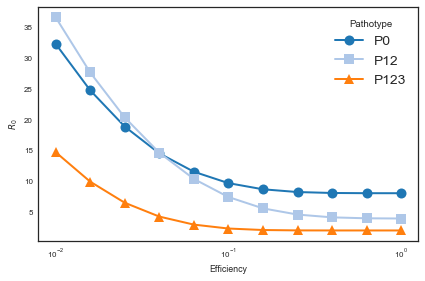

In [29]:
sns.set_context('paper')
sns.set_palette('tab20')
fig, ax = plt.subplots(1)
#fig.set_size_inches(5,4)
marker_dict = dict(P0 = 'o', P12 = 's', P123 = '^')
ax.plot(lamb_list, surv_data['P0'], marker= marker_dict['P0'], lw = 2, markersize = 10)
ax.plot(lamb_list, surv_data['P12'], marker = marker_dict['P12'], lw = 2, markersize = 10)
ax.plot(lamb_list, surv_data['P123'], marker = marker_dict['P123'], lw = 2, markersize = 10)
leg = ax.legend(title='Pathotype', fontsize = 'x-large')
ax.set_xscale('log')
ax.set_xlabel('Efficiency')
ax.set_ylabel('$R_{0}$')
fig.tight_layout()
fig.savefig('C:/Users/Bruno/Dropbox/ARTICULOS/cpv_2016/figures/figure_8.png', dpi=300)
plt.show()